In [39]:
import os
import time
import math
import json
import random
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [40]:
path = '/home/user/Videos/data.csv'
result = pd.read_csv(path,index_col=0)

In [41]:
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0.683735,1.000000,6,6,6,0.545455,10,10,6,1,0.571429,0.5,1
1,0.683735,1.000000,6,6,6,0.545455,10,10,6,1,0.571429,0.5,1
2,0.572509,0.500000,1,1,1,0.500000,1,1,1,1,1.000000,1.0,1
3,0.884629,1.000000,2,2,1,0.500000,3,2,1,1,1.000000,1.0,1
4,0.591580,0.666667,2,2,2,0.000000,2,2,2,1,0.000000,0.0,1


In [42]:
y = result['label']
X = result.drop(['label'],axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [44]:
model = SVC(probability=True,kernel='linear')

In [45]:
print("Default kernel:", model.kernel)

Default kernel: linear


In [46]:
# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [47]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [48]:
# Get weights (coefficients)
weights = model.coef_
intercept = model.intercept_

print("Weights (Coefficients):", weights)
print("Intercept:", intercept)

Weights (Coefficients): [[ 2.57670968e-01  6.32754338e-02  1.22274015e-01 -2.28372349e-02
   1.16983764e-02  3.38452299e-03  2.49720770e-03  3.67858443e-03
  -5.32785205e-02  1.93240751e+00  1.33156170e-03  9.10056652e-02]]
Intercept: [-1.04332886]


In [49]:
# Calculate AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f'AUROC: {auroc:.2f}')

AUROC: 0.95


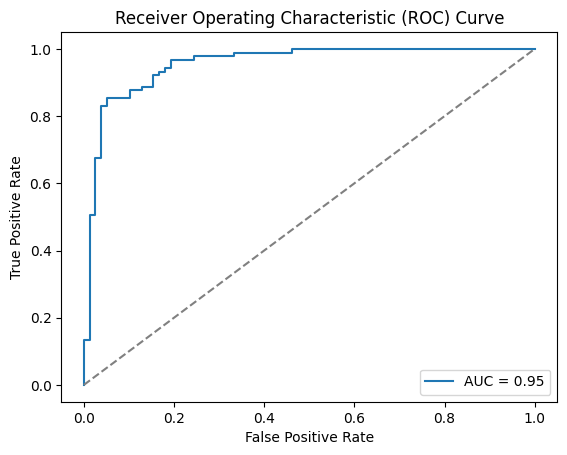

In [50]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [52]:
print(precision,recall)

0.8876404494382022 0.8876404494382022


In [53]:
# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[68 10]
 [10 79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        78
           1       0.89      0.89      0.89        89

    accuracy                           0.88       167
   macro avg       0.88      0.88      0.88       167
weighted avg       0.88      0.88      0.88       167

